***Yelp Recommendation to setup a New Restaurant***

**Motivation** - To analyze various factors to be considered for establishing a new restaurant
business in San Francisco area.


In [2]:
#Importing reqired Libraries

import pandas as pd # data processing, CSV file I/O 
import numpy as np # linear algebra
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline



In [3]:
# Import the dataset
yelp = pd.read_csv('C:/Users/rajes/Desktop/NYDS/Web Scraping in Python/yelpanalyze/restaurants3.csv')
yelp.head()

,Category,Overallrating,Name,Delivery,NumberReviews,PriceRange
0,Sushi Bars,4.0,Tataki,No,1199,$$
1,Mediterranean,4.5,Lokma,Yes,159,$$
2,Mexican,4.0,Tropisueño,No,4029,$$
3,Chicken Wings,4.5,Hot Sauce and Panko,Yes,1014,$
4,American (Traditional),4.0,Eats,No,1030,$$


**Cleaning Data** - To cleanup the data, I'm considering to review the following:
1. Missing Data
2. Invalid Data

In [34]:
#Info

yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 6 columns):
Category         990 non-null object
Overallrating    990 non-null float64
Name             990 non-null object
Delivery         966 non-null object
NumberReviews    990 non-null int64
PriceRange       990 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.5+ KB


In [4]:
#To check is we have any null value - Missing Data
yelp.isna().any()

Category         False
Overallrating    False
Name             False
Delivery          True
NumberReviews    False
PriceRange       False
dtype: bool

In [5]:
#Finding out the percentage of missing data
yelp.isna().mean().round(4) * 100

Category         0.00
Overallrating    0.00
Name             0.00
Delivery         2.42
NumberReviews    0.00
PriceRange       0.00
dtype: float64

In [6]:
# Replacing N/a with NaN rather than deleting the records as the missing data is only 2.4%
yelp['Delivery'] = yelp['Delivery'].fillna('na')
yelp.isna().any()

Category         False
Overallrating    False
Name             False
Delivery         False
NumberReviews    False
PriceRange       False
dtype: bool

In [38]:
# #Using a histogram to find the distribution of Number of reviews
# #sns.set()
# plt.hist(yelp['NumberReviews'], bins=30, alpha=0.5,
#          histtype='stepfilled', color='red',
#          edgecolor='none');
# plt.xlabel('No. Of Reviews')
# plt.ylabel('No.Of Restaurants')

Text(0.5, 0, 'No. Of Reviews')

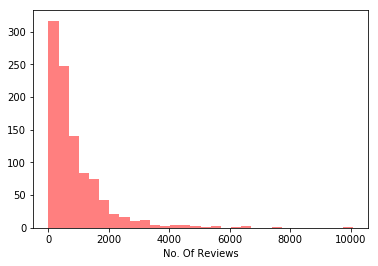

In [7]:
#Using a histogram to find the distribution of Number of reviews
#sns.set()
plt.hist(yelp['NumberReviews'], bins=30, alpha=0.5,
         histtype='stepfilled', color='red',
         edgecolor='none');
plt.xlabel('No. Of Reviews')
#plt.ylabel('No.Of Restaurants')

From the above observations: 
1. we have only 2.4% of missing data for Delivery column which is replaced by NA and can be ignored for further analysis.
2. Considering restaurants having more number of Reviews[1000] - Based on the above distribution we can't ignore any rows for column "Number of Reviews" as major percentage of restaurants are having less than 100 reviews.


***Factors Influencing for a steup of New Restaurants***

**1. Delivery - Analyzing if delivery have an impact on restaurant business**

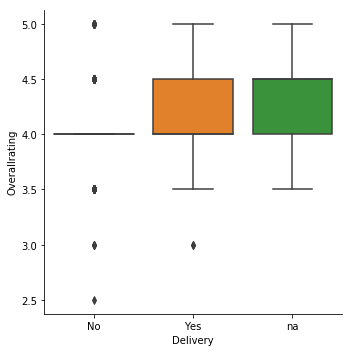

In [8]:
# Box plot between Delivery and OverallRating
sns.catplot(x="Delivery", y="Overallrating", kind ='box' ,data=yelp);

From above analysis - Restaurants with Delivery have average of more ratings compared to restaurants without delivery.

**2. Price Range - Analyzing if Price Range have an impact on restaurant business**

In [9]:
# Replace the dollar value  with price range
yelp.PriceRange = yelp.PriceRange.replace({"$": "Under $10","$$": "$11-30","$$$":"$31-60","$$$$":"Above $61"})
yelp.PriceRange.value_counts()

$11-30       667
Under $10    144
$31-60       138
Above $61     41
Name: PriceRange, dtype: int64

In [10]:
#Preview of dataset with Price Range
yelp.head()

,Category,Overallrating,Name,Delivery,NumberReviews,PriceRange
0,Sushi Bars,4.0,Tataki,No,1199,$11-30
1,Mediterranean,4.5,Lokma,Yes,159,$11-30
2,Mexican,4.0,Tropisueño,No,4029,$11-30
3,Chicken Wings,4.5,Hot Sauce and Panko,Yes,1014,Under $10
4,American (Traditional),4.0,Eats,No,1030,$11-30


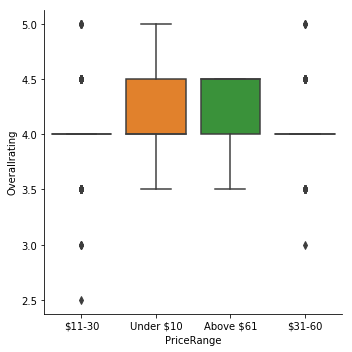

In [11]:
# Box plot between PriceRange and OverallRating 
sns.catplot(x="PriceRange", y="Overallrating", kind ='box' ,data=yelp);

In [44]:
# Creating a bar plot for more insight of PriceRange
# f, ax = plt.subplots(figsize=(18, 6))
# sns.barplot(x="PriceRange", y="Overallrating", data=yelp)
# plt.legend(loc='upper right',title='Price')

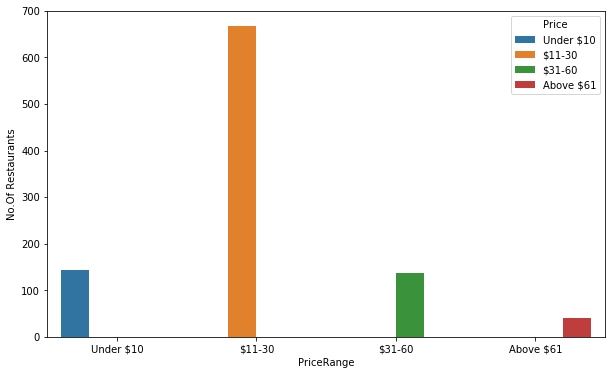

In [12]:
#Finding out the popular Price Range
f, ax = plt.subplots(figsize=(10, 6))
Y2 = pd.DataFrame(yelp.groupby(['PriceRange']).Overallrating.count()).reset_index()
Y2['PriceRange'] = pd.Categorical(Y2['PriceRange'], ['Under $10', '$11-30', '$31-60', 'Above $61'])
Y2 = Y2.sort_values('PriceRange')
sns.barplot(x="PriceRange", y="Overallrating", hue = 'PriceRange', data=Y2)
ax.set(ylabel='No.Of Restaurants')
plt.legend(loc='upper right',title='Price')

This identifies that restaurants in price range of Under 10 and Above 61 have higher ratings but the count of restaurants with price range $ "11-30" are way higher than any other.

**Cuisine - Identifying the best Cuisines**

In [13]:
#  Identify  Top Cuisine.
TopCuisine = (yelp.groupby('Category',  as_index=False)
       .agg({'NumberReviews':'sum', 'Overallrating':'mean'}))
TopCuisine= TopCuisine.sort_values(['NumberReviews'], ascending=[False])
TopCuisine2 = TopCuisine.head(20)
TopCuisine2

,Category,NumberReviews,Overallrating
1,American (New),67791,4.006410
67,Italian,63484,4.026667
99,Seafood,63339,3.987500
15,Breakfast & Brunch,46829,4.142857
2,American (Traditional),41864,3.967742
77,Mexican,41853,4.000000
51,French,29968,4.107143
122,Vietnamese,27857,4.000000
88,Pizza,26604,4.325000
30,Chinese,23669,3.931818


[Text(0, 0.5, 'Cuisine')]

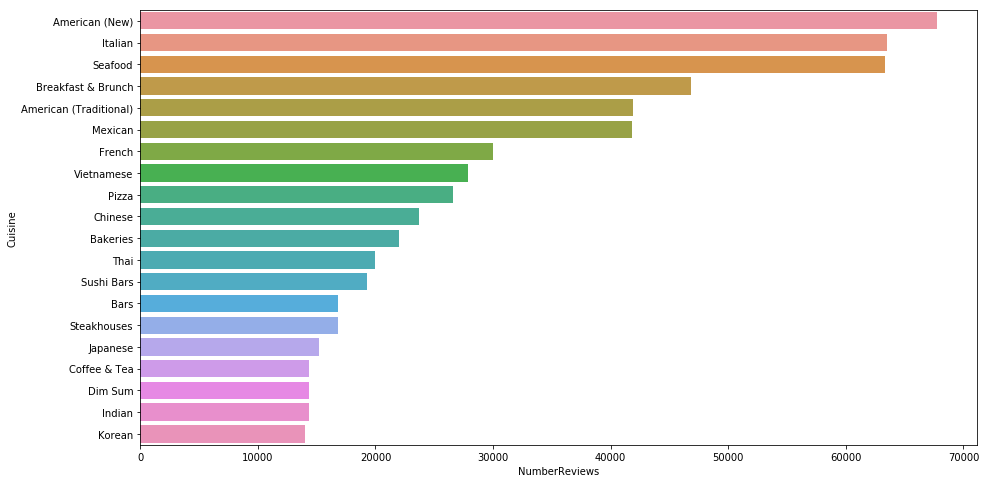

In [14]:
#Plotting data for Top 20 Cuisines
f, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x="NumberReviews", y="Category", data=TopCuisine2)
ax.set(ylabel='Cuisine')

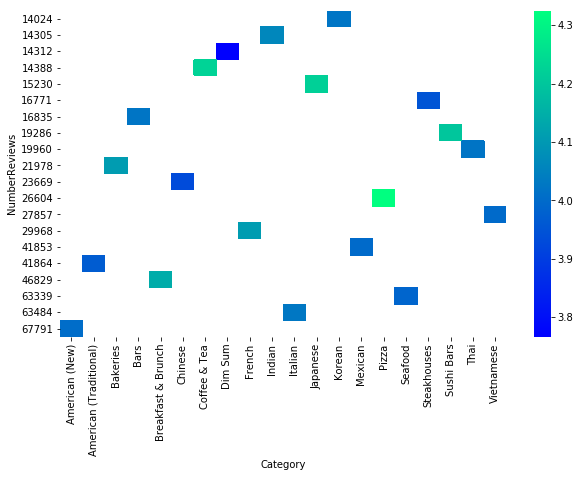

In [16]:
fig = plt.subplots(figsize=(10,6))         # Sample figsize in inches
#sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)

TopCuisine3 = TopCuisine2.pivot("NumberReviews", "Category", "Overallrating")
ax = sns.heatmap(TopCuisine3, cmap="winter")